In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.patches as ppt
import os 
import sys 

path ='../src'
if path not in sys.path:
    sys.path.insert(1,path)
from utils_OB import *
from preposessing import *
import _tracking as tc

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import seaborn as sns

sns.set_theme(context='paper', style='ticks',color_codes='deep')


In [2]:
folder=import_folder_for_tracking('../../5hz_clustered_2_first100/')

In [3]:
omegas,phis,names=folder

c:\Users\olebj\miniconda3\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\olebj\miniconda3\lib\site-packages\matplotlib\collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
C:\Users\olebj\AppData\Local\Temp\ipykernel_14248\2244737858.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list)
C:\Users\olebj\AppData\Local\Temp\ipykernel_14248\2244737858.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([_,r'$\varphi_{1,6}$',_])


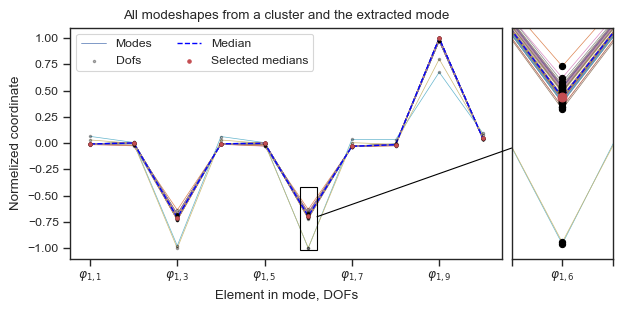

In [3]:
files=os.listdir('../../5hz_clustered_2_first100/')
ts=import_converted_ts('../../5hz_clustered_2_first100/',files[1])

phis=ts.phi_auto
# print(len(phis)) 
# print((phis[0]))
# print(len(phis[0][0]))
# print((phis[0][0][0]))
# PlotStabDiagFromTsObject(ts,display=True)
matplotlib.use('module://matplotlib_inline.backend_inline')

figure=plt.figure(figsize=(7,3))
ax =plt.subplot2grid((1,10),(0,0),1,8,fig=figure)
phi=phis[6].T
for i, mode in enumerate(phi):
    phi[i]/=np.max(np.abs(phi[i,:9]))

def plot(ax,size,ap):
    
    for i,pole in enumerate(phi):
        if i==0:
            pole=pole[:10]
            lines=ax.plot(range(len(pole)),pole,alpha=1,linewidth=0.5,
                        zorder=-1,label='Modes')
            dots=ax.scatter(range(len(pole)),pole,c='black',
                            s=size,alpha=ap,label='Dofs')
        else: 
            pole=pole[:10]
            lines=ax.plot(range(len(pole)),pole,alpha=1,linewidth=0.5,
                        zorder=-1)
            dots=ax.scatter(range(len(pole)),pole,c='black',
                            s=size,alpha=ap)
        # ax.grid()
    median=np.median(phi[:,:10],axis=0)
    medians=ax.plot(range(len(median)),median,
            linestyle='--',color='blue',linewidth=1,zorder=0,label='Median')
    ax.scatter(range(len(median)),median,c='r',s=2*size,label='Selected medians')
    # fig.canvas.draw()
list=[r'$\varphi_{1,1}$',r'$\varphi_{1,1}$',r'$\varphi_{1,3}$',r'$\varphi_{1,5}$',r'$\varphi_{1,7}$',r'$\varphi_{1,9}$']

plot(ax,3,0.3)    

ax.set_xticklabels(list)
ax.set_title('All modeshapes from a cluster and the extracted mode')
ax.set_xlabel('Element in mode, DOFs')
ax.set_ylabel('Normelized coordinate')
patch=ppt.Rectangle((4.8,-1.02),0.4,0.6,fill=False,ec='black')
ax.add_patch(patch)
ax.legend(loc='upper left',ncols=2)
# ax.legend()

###########################
ax2=plt.subplot2grid((1,10),(0,8),1,2,fig=figure)
plot(ax2,20,1)
ax2.set_ylim(-1.03,-0.55)
ax2.set_xlim(4.8,5.2)
ax2.set_yticklabels([])
ax2.set_yticks([])
ax2.set_xticklabels([_,r'$\varphi_{1,6}$',_])


xyA=[5.2,-0.7]
xyB=[4.8,-0.8]
con = ppt.ConnectionPatch(xyA=xyA, xyB=xyB, coordsA="data", coordsB="data",
                      axesA=ax, axesB=ax2, color="black")
ax2.add_artist(con)


plt.savefig(fname='../Simple Figures/mode_picking_figure',dpi=500,bbox_inches='tight')
plt.show()



In [3]:
fig=PlotStabDiagFromTsObject(ts,
                             display=True,true_w=True
                             ,color='mac',xmax=0.5)

test2
test3


147
147


TypeError: list indices must be integers or slices, not tuple

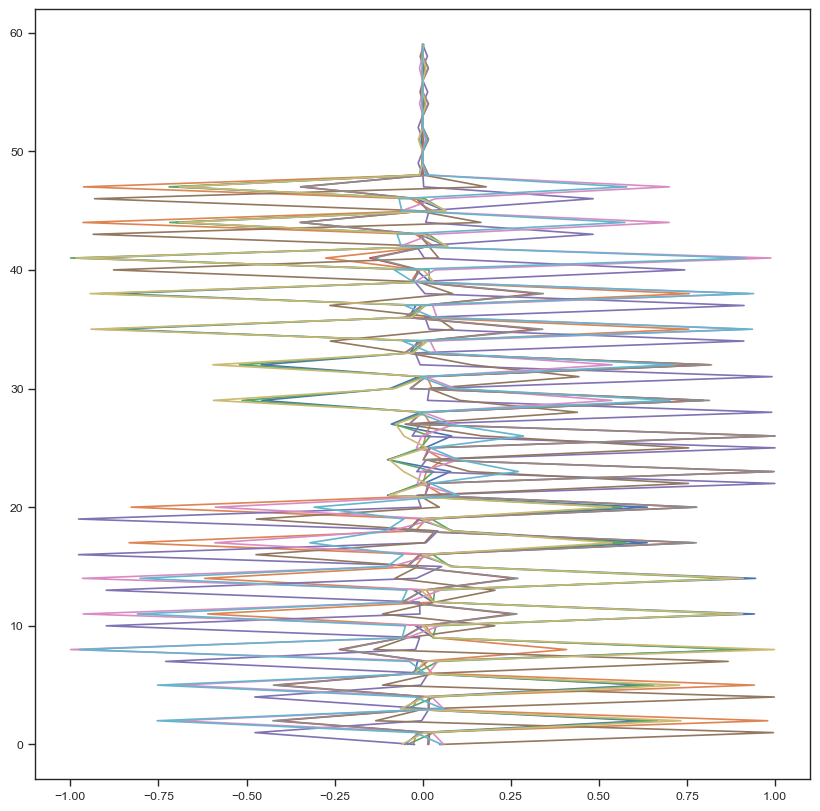

In [30]:
print(len(omegas))
print(len(phis))
fig,ax=plt.subplots(figsize=(10,10))
range=np.arange(60)
median=np.zeros_like(phis[:10])
for i,phi in enumerate( phis[:10]): 
    ax.plot(phi[3],range)
    median[i]=phi[3]
    # print(phi[3])

median=np.median(phis[:10],axis=1)
print(median)
ax.plot(median,range,linewidth=4)
plt.show()

In [8]:
path='../../5hz_clustered_2/'
segments=[]
names=os.listdir(path)
names.sort()
for name in names:
    ts=import_converted_ts(path,name)
    segments.append(ts)

In [9]:
PlotPolesFromSegments(segments)


In [48]:
 mode_traces = tc.perform_tracking(omegas, phis, n = 50, m = 30, d_track_threshold=0.1,method='average')

In [22]:
print(len(mode_traces))
print(dir(mode_traces[0]))
trace_2=mode_traces[3]

28
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_diff', 'add_mode', 'add_mode_for_next_ref_mode', 'added_mode_in_curr_time_seg', 'check_added_mode_in_curr_time_seg', 'dhf', 'dhmac', 'frequencies', 'mode_shapes', 'n_skipped_time_seg', 'plot_modes', 'plot_trace', 'ref_frequency', 'ref_mode_frequency_temp', 'ref_mode_shape', 'ref_mode_shape_temp', 'ref_time_stamp_temp', 'set_added_mode_in_curr_time_seg', 'set_error', 'set_next_ref_mode', 'set_ref_mode', 'time_seg']


In [52]:
test=trace_2.frequencies
print(test)
i=3

trace_2=mode_traces[i]
plt.figure(figsize=(20,5))
plt.scatter(range(len(test)),test,s=1)
plt.show()

[0.6558198187272637, 0.6566130024448691, 0.6562477308155114, 0.6587410040468116, 0.6574972213973409, 0.6506338022346085, 0.6614236609848114, 0.6652886144235478, 0.665786734579787, 0.6617440895561645, 0.6573498142254883, 0.6606781727754748, 0.6641974050362645, 0.6664067274971657, 0.6641962309288567, 0.659328411075221, 0.6601990993619258, 0.6559948309509788, 0.6588275563487599, 0.656754539988609, 0.6674024089505585, 0.6607019860348905, 0.6598997417614552, 0.6574483177057109, 0.6579775538941672, 0.662421854062157, 0.6604296787016922, 0.6601327208232438, 0.655906143258443, 0.6649168615314884, 0.663777571487, 0.6583689432977545, 0.6531616531510523, 0.6581561304403734, 0.6503172675064854, 0.6535539539172877, 0.6551920961873059, 0.6451278453106721, 0.6570314648823254, 0.6629373712951738, 0.6548064906614278, 0.6563643424968473, 0.6503849374299986, 0.656861575107381, 0.6593567452452789, 0.6624240985496628, 0.6580720486739855, 0.6545392369822959, 0.6526971602357663, 0.6523394032199326, 0.6551537

### Temp data

In [35]:
path='../../../data/Temperaturdata 2 stasjoner.csv'
data=pd.read_csv(path,sep=';')
# data['Lufttemperatur']=data['Lufttemperatur'].astype(float)

data['Tid(norsk normaltid)']=pd.to_datetime(data['Tid(norsk normaltid)'],format='%d.%m.%Y %H:%M')
data.set_index(['Tid(norsk normaltid)'],inplace=True)
# data[
    # 'Tid(norsk normaltid)'].astype('datetime64[ns]')
data.head()
ullensvang=data[data['Navn']=='Ullensvang Forsøksgard']


def TempFromTs(df,ts): 
    
    name=ts.series_metadata['file_name']
    date=name[7:20] #YYYY-MM-DD_hh
    date_obj=pd.to_datetime(date,format='%Y-%m-%d_%H')
    idx = df.iloc[df.index.get_indexer((date_obj,), method='nearest')]
    return idx['Lufttemperatur'][0]


In [36]:
segment_temps=np.array([])

# segment_names=os.listdir('../../5hz_clustered_2/')
segment_names.sort()
for segment in segments:
    temp= TempFromTs(ullensvang,segment)
    segment_temps=np.append(segment_temps,temp) 

NameError: name 'segment_names' is not defined

In [ ]:
plt.plot(range(len(segment_temps)),segment_temps)
plt.show()